## 3115-Lab Programming Machine Learning

### Lab Exercise 1
**Yuvaraj Prem Kumar, 303384**

### 1.1 Python and Numpy (8 Points)

* Compute the sum for all subjects for each student. <br>
* Compute the average of the point for each student. (total points are 500). <br>
* Compute the standard deviation of point for each student.<br>
* Plot the average points for all the students (in one figure).<br>
* For each student assign a grade based on the following rubric.<br>
* Plot the histogram of the final grades.<br>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Data pre-processing
df = pd.read_csv('Grades.csv')
df['Name'] = df['First Name'] +' '+ df['Last Name']
df = df[['Name', 'English', 'Maths', 'Science', 'German', 'Sports' ,'Final Grade']]
df.head(5)

,Name,English,Maths,Science,German,Sports,Final Grade
0,Robyn Hobgood,60.95,24.77,20.60,69.32,8.36,184.00
1,Eddy Swearngin,100.00,12.99,100.00,52.24,100.00,365.23
2,Leoma Bridgman,83.37,100.00,78.69,100.00,19.50,381.56
3,Arnetta Peart,87.75,100.00,86.93,87.90,41.73,404.31
4,Maryland Colby,100.00,100.00,100.00,18.87,88.72,407.59


In [4]:
# Sum of all subjects for each students is already computed in the input file column "Final Grade"
# So we can just read from input dataframe and store into the new output table "df2"

df2 = df[['Name','Final Grade']]
df2.rename(columns={'Final Grade':'Sum'}, inplace=True)


In [6]:
df2.loc[:,'Avg'] = df2.loc[:,'Sum'] / 5  # Average point, given total no. of subjects is 5

In [7]:
if 'Final Grade' in df.columns:  # Check if exists, for easier re-run
    df.drop(['Final Grade'], inplace=True,axis = 1)  # Drop 'Final Grade' column before calc std dev of all subjects

df2.loc[:,'Std Dev'] = df.std(axis=1)
df2.head(5)

,Name,Sum,Avg,Std Dev
0,Robyn Hobgood,184.00,36.800,26.724368
1,Eddy Swearngin,365.23,73.046,39.430848
2,Leoma Bridgman,381.56,76.312,33.186278
3,Arnetta Peart,404.31,80.862,22.535389
4,Maryland Colby,407.59,81.518,35.360266


<function matplotlib.pyplot.show(*args, **kw)>

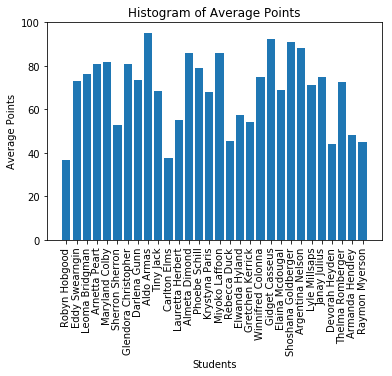

In [8]:
# Plotting histogram of the average points for each students
bins=df2['Name'].tolist()  # Convert to numeric for plotting
plt.bar(bins,df2['Avg'])
plt.xticks(rotation=90)
plt.xlabel('Students')
plt.ylabel('Average Points')
plt.title('Histogram of Average Points')
plt.show

In [9]:
# Grade rubric function
def rubric(i):
    if i >= 96: return 'A+'
    elif i < 96 and i >= 90: return 'A '
    elif i < 90 and i >= 86: return 'A-'
    elif i < 86 and i >= 80: return 'B+'
    elif i < 80 and i >= 76: return 'B '
    elif i < 76 and i >= 70: return 'B-'
    elif i < 70 and i >= 66: return 'C+'
    elif i < 66 and i >= 60: return 'C '
    elif i < 60 and i >= 56: return 'D '
    else: return 'F '

In [10]:
df2.loc[:,'Grade'] = df2['Avg'].apply(rubric)  # Call the function and append the grade column to dataframe
df2.head(5)

,Name,Sum,Avg,Std Dev,Grade
0,Robyn Hobgood,184.00,36.800,26.724368,F
1,Eddy Swearngin,365.23,73.046,39.430848,B-
2,Leoma Bridgman,381.56,76.312,33.186278,B
3,Arnetta Peart,404.31,80.862,22.535389,B+
4,Maryland Colby,407.59,81.518,35.360266,B+


In [11]:
df3 = df2.groupby(["Grade"])["Name"].count().reset_index(name="Count")  # Adapted from [2]
df3

,Grade,Count
0,A,3
1,A-,1
2,B,2
3,B+,5
4,B-,6
5,C+,3
6,D,1
7,F,9


<function matplotlib.pyplot.show(*args, **kw)>

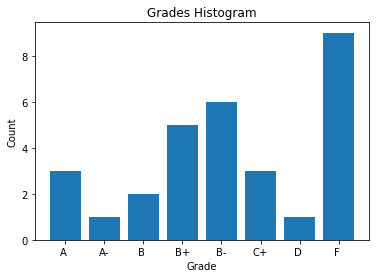

In [12]:
# Plotting total grades histogram
bins=df3['Grade'].tolist()  # Convert to numeric for plotting
plt.bar(bins,df3['Count'])
plt.xlabel('Grade')
plt.ylabel('Count')
plt.title('Grades Histogram')
plt.show

**Matrix Multiplication:** <br>
Create a matrix A of dimensions n x m, where n = 100 and m = 20. <br>
Create a vector v of dimension m x 1. <br>
Initialize the matrix with random values and vector with normal distribution using mu = 5 and sigma = 0:01. <br>
Perform following operation on them: <br>
* Iterative multiply (element-wise) each row of matrix A with vector v and sum the result of each iteration in another vector c
* Find the mean and standard deviation of the new vector c
* Plot histogram of vector c using 5 bins

In [13]:
A = np.random.rand(100,20)
v = np.random.normal(5,0.01,20)
A.shape,v.shape

((100, 20), (20,))

In [14]:
# A (dot) V will be a vector, C of dimensions [100 x 1]
C = []
for i in range(100):  # Adapted from [1]
    temp = 0
    for j in range(20):
        temp += A[i][j] * v[j]
    C.append(temp)
print(C)

[51.764264544546506, 42.90591956915882, 56.59198610697077, 43.892326301457516, 55.83449450716335, 57.309975713735284, 47.13988949095796, 42.91496699384526, 53.46743601932968, 52.38757152293144, 50.37506623730151, 43.589349409290385, 49.95204237211974, 50.06311336602424, 46.75702349568435, 66.32420535421497, 45.295569949651274, 44.352250705168366, 45.035444659652256, 54.23668706472343, 41.97989567517654, 50.99330803864872, 49.412371555826184, 54.33013264116764, 54.723395540276734, 46.84606286942632, 45.21468420663442, 55.99398365538221, 50.5139315397766, 48.45894959728763, 49.973822930439205, 44.70364547164083, 48.21555524707761, 52.70407880934537, 63.38284224608186, 52.49880533570432, 36.70984477037065, 56.28873313229291, 48.99563363209026, 46.865728362194076, 44.81337820532986, 40.79692197976647, 37.12385011860989, 41.444121193515485, 55.11261744124998, 56.98389169058872, 46.03793608295995, 56.339708432013225, 47.215969488493215, 60.442513104660456, 45.15801208280878, 55.0168095253107

In [15]:
muC = np.mean(C)
sigmaC = np.std(C)
print("Mean: ", muC, "\nStandard Deviation: ", sigmaC)

Mean:  49.70656768618238 
Standard Deviation:  6.4211228137203635


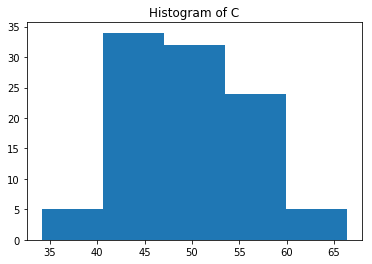

In [16]:
# Plotting histogram of C
plt.hist(C, bins = 5)    
plt.title('Histogram of C')
plt.show()

### 1.2.1 OLS using an artificial dataset

* Generate some simple data. i.e. a matrix A with dimensions 100 x 2. Initialize it with normal distribution mu = 2 and sigma = 1
* Implement LEARN-SIMPLE-LINREG algorithm and train it using matrix A to learn values of B0 and B1
* Implement PREDICT-SIMPLE-LINREG and calculate the points for each training example in matrix A.
* Plot the training data (use plt.scatter) and your predicted line (use plt.plot).
* Put B0 to zero and rerun the program to generate the predicted line. Comment on the change you see for the varying values of sigma
* Put B1 to zero and rerun the program to generate the predicted line. Comment on the change you see for the varying values of sigma
* Use numpy.linalg lstsq to replace step 2 for learning values of B0 and B1. Explain the difference between your values and the values from numpy.linalg lstsq.

In [17]:
# Input data
A = np.random.normal(2,1,(100,2))
A.shape

(100, 2)

**LEARN-SIMPLE-LINREG**<br>
From the slide 18/39 in [2]:
<img src="https://i.imgur.com/IuNm4EM.jpg" style="height:250px">

In [18]:
# Function to find beta values, also adapted from [4]
def learn_simple_linreg(x,y):
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    num = np.multiply((x - x_mean), (y - y_mean))
    denom = (x - x_mean)**2
    b1 = np.sum(num)/np.sum(denom)
    b0 = y_mean - b1 * x_mean
    return b0, b1

In [19]:
# For input data, I just take the first column of A as X(observations) and second column of A as Y(predictions)
x = A[:,0]
y = A[:,1]

b0,b1 = learn_simple_linreg(x,y)
print("b0 = {} \nb1 = {}".format(b0,b1))

b0 = 1.4022932066140947 
b1 = 0.24767996768704423


**PREDICT-SIMPLE-LINREG**<br>
I cannot find this algorithm in the lecture slides, anyway we know that the prediction can be made using the line of best-fit, for the so-called 'y hat' or predicted value of y:

$
\tilde{y} = \beta_0 + \beta_1*x[i]
$



In [20]:
def predict_simple_linreg(x,b0, b1):
    yhat = b0 + x*b1
    return yhat

In [21]:
yhat = predict_simple_linreg(x,b0,b1)
print(yhat[0:5])  # Output sample values

[1.688444   1.8542707  2.03547738 1.99866575 2.15991392]


In [22]:
# Plotting function
def plots(x,y,yhat):
    plt.scatter(x, y, label='Training data')  # Scatter plot of training data
    plt.plot(x, yhat, 'y', label='Predicted line')
    plt.legend()
    plt.show()

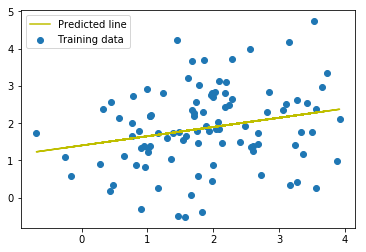

In [23]:
# For calculated b0,b1,yhat
plots(x,y,yhat)

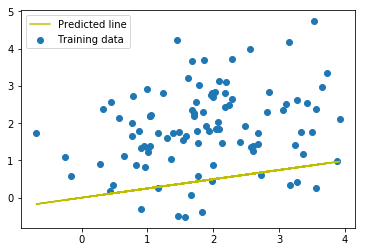

In [24]:
# When b0 = 0
yhat_2 = predict_simple_linreg(x,0,b1)
plots(x,y,yhat_2)

$\beta_0$ is the distance of the regression line from the origin. Hence when its '0' the line originates from x=0; causing the lowering skew seen.

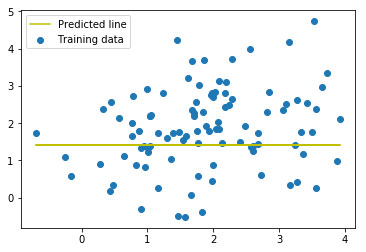

In [25]:
# When b1 = 0 
yhat_3 = predict_simple_linreg(x,b0,0)
plots(x,y,yhat_3)

$\beta_1$ represents the gradient or slope component of the regression line. When it is 0, this line becomes flat (horizontal). Also the regression line becomes 1-D since $X$ multiply 0 is also 0, hence only the $\beta_0$ value is being plotted.

In [28]:
# Using numpy linear algebra toolkit, code adapted from [5]
def lstsq(x,y):
    A = np.vstack([x, np.ones(len(x))]).T
    m, c = np.linalg.lstsq(A, y, rcond=None)[0]
    return c, m  # b0 and b1

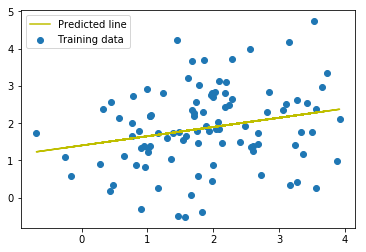

In [29]:
b0_2, b1_2 = lstsq(x,y)
yhat_4 = predict_simple_linreg(x,b0_2,b1_2)
plots(x,y,yhat_4)

The results are identical.

### 1.2.2 OLS using a Real dataset

* Load the dataset and split it into our uni-variate case. use 'Displacement' as the independent variable and 'MPG' as the dependant variable.
* Implement LEARN-SIMPLE-LINREG algorithm and train it using matrix A to learn values of $\beta_0$ and $\beta_1$.
* Implement PREDICT-SIMPLE-LINREG and calculate the points for each training example in matrix A.
* Plot the training data (use plt.scatter) and your predicted line (use plt.plot).
* Repeat the above but change the indepedant variable to ["horsepower","weight","acceleration"]. Dependant variable stays as MPG.
* Comment on the behavior you notice for each of the independent variable.
* Use scikit learn to implement OLS Linear Model.
* Plot the training data (use plt.scatter) and your predicted line (use plt.plot).

In [52]:
# Data preprocessing function taken from [6] and also from my DDA Lab 5 (SoSe2019)
#

def generate_data():
    filename = "auto-mpg.data"
    column_names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin','name']
    df = pd.read_csv(filename, delim_whitespace=True, header=None, na_values="?", names=column_names)
    df = df.drop('name', axis=1)
    df = df.dropna()
    print(df.head(5))
    x_data = df.drop(['mpg','cylinders','year','origin'], axis=1)
    y_data = df[['mpg']]  # Continuous target variable : mpg
    #x_data = pd.DataFrame(normalize(x_data))
    #y_data = pd.DataFrame(normalize(y_data))

    return x_data, y_data

In [53]:
x_data, y_data = generate_data()

    mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
0  18.0          8         307.0       130.0  3504.0          12.0    70   
1  15.0          8         350.0       165.0  3693.0          11.5    70   
2  18.0          8         318.0       150.0  3436.0          11.0    70   
3  16.0          8         304.0       150.0  3433.0          12.0    70   
4  17.0          8         302.0       140.0  3449.0          10.5    70   

   origin  
0       1  
1       1  
2       1  
3       1  
4       1  


In [54]:
print(x_data[0:5])
print(y_data[0:5])

   displacement  horsepower  weight  acceleration
0         307.0       130.0  3504.0          12.0
1         350.0       165.0  3693.0          11.5
2         318.0       150.0  3436.0          11.0
3         304.0       150.0  3433.0          12.0
4         302.0       140.0  3449.0          10.5
    mpg
0  18.0
1  15.0
2  18.0
3  16.0
4  17.0


I dont know why the question is asking for "Matrix A" here, must be a typo in this part. Anyway the same functions in part 1 can be applied here for the univariate linear regression.

In [55]:
# When X is Displacement
x = x_data.iloc[:,0].values  # To get array 
y = y_data.iloc[:,0].values

b0_1,b1_1 = learn_simple_linreg(x,y)
print("b0 = {} \nb1 = {}".format(b0_1,b1_1))
yhat_1 = predict_simple_linreg(x,b0_1,b1_1)
print(yhat_1[0:5])  # Output sample values

b0 = 35.12063593840391 
b1 = -0.06005142781220625
[16.6848476  14.1026362  16.02428189 16.86500188 16.98510474]


In [56]:
# When X is Horsepower
x2 = x_data.iloc[:,1].values
b0_2,b1_2 = learn_simple_linreg(x2,y)
print("b0 = {} \nb1 = {}".format(b0_2,b1_2))
yhat_2 = predict_simple_linreg(x2,b0_2,b1_2)
print(yhat_2[0:5])

b0 = 39.93586102117047 
b1 = -0.15784473335365362
[19.41604569 13.89148002 16.25915102 16.25915102 17.83759835]


In [60]:
# When X is Weight
x3 = x_data.iloc[:,2].values
b0_3,b1_3 = learn_simple_linreg(x3,y)
print("b0 = {} \nb1 = {}".format(b0_3,b1_3))
yhat_3 = predict_simple_linreg(x3,b0_3,b1_3)
print(yhat_3[0:5])  # Output sample values

b0 = 46.21652454901758 
b1 = -0.007647342535779581
[19.4202363  17.97488856 19.9402556  19.96319762 19.84084014]


In [58]:
# When X is Acceleration
x4 = x_data.iloc[:,3].values
b0_4,b1_4 = learn_simple_linreg(x4,y)
print("b0 = {} \nb1 = {}".format(b0_4,b1_4))
yhat_4 = predict_simple_linreg(x4,b0_4,b1_4)
print(yhat_4[0:5])  # Output sample values

b0 = 4.8332498048437955 
b1 = 1.1976241877320561
[19.20474006 18.60592796 18.00711587 19.20474006 17.40830378]


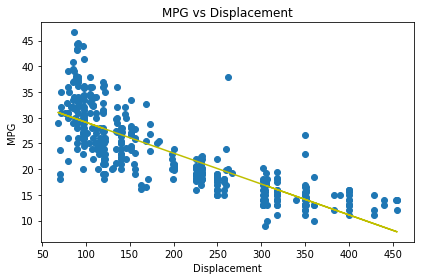

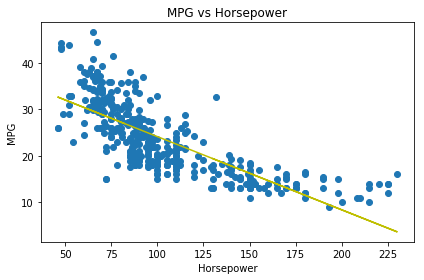

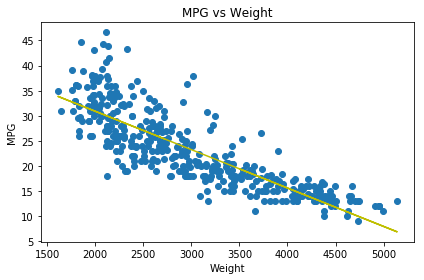

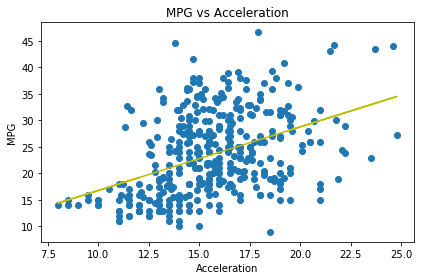

In [70]:
# First subplot
ax = plt.subplot()
plt.scatter(x,y) 
plt.plot(x,yhat_1,'y')
plt.title('MPG vs Displacement')
plt.xlabel('Displacement')
plt.ylabel('MPG')
plt.tight_layout()
plt.show()

# Second subplot
ax = plt.subplot()
plt.scatter(x2,y)
plt.plot(x2,yhat_2,'y')
plt.title('MPG vs Horsepower')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.tight_layout()
plt.show()

# Third subplot
ax = plt.subplot()
plt.scatter(x3,y)
plt.plot(x3,yhat_3,'y')
plt.title('MPG vs Weight')
plt.xlabel('Weight')
plt.ylabel('MPG')
plt.tight_layout()
plt.show()

# Fourth subplot
ax = plt.subplot()
plt.scatter(x4,y)
plt.plot(x4,yhat_4,'y')
plt.title('MPG vs Acceleration')
plt.xlabel('Acceleration')
plt.ylabel('MPG')
plt.tight_layout()
plt.show()

From an intial glance each independant variable looks to have a linear relationship with the dependant variable MPG. However plotting them indiviually reveals a rather large variance in the predicted values and line of best fit. Hence a better method would be the include all the independant variables together and model this as a multivariate linear regression.

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import normalize
x_data, y_data = generate_data()

x_data = x_data.iloc[:,0].values
y_data = y_data.iloc[:,0].values


xTrain, xTest, yTrain, yTest = train_test_split(x_data, y_data, test_size = 0.2, random_state = 0)
xTrain= xTrain.reshape(-1, 1)
yTrain= yTrain.reshape(-1, 1)
xTest = xTest.reshape(-1, 1)
yTest = yTest.reshape(-1, 1)

    mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
0  18.0          8         307.0       130.0  3504.0          12.0    70   
1  15.0          8         350.0       165.0  3693.0          11.5    70   
2  18.0          8         318.0       150.0  3436.0          11.0    70   
3  16.0          8         304.0       150.0  3433.0          12.0    70   
4  17.0          8         302.0       140.0  3449.0          10.5    70   

   origin  
0       1  
1       1  
2       1  
3       1  
4       1  


In [72]:
linearRegressor = LinearRegression()
linearRegressor.fit(xTrain, yTrain)
yPrediction = linearRegressor.predict(xTest)

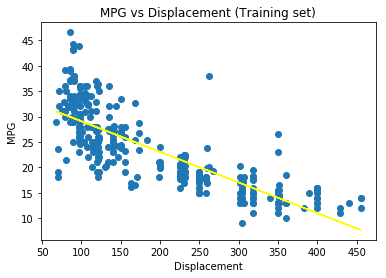

In [73]:
plt.scatter(xTrain, yTrain)
plt.plot(xTrain, linearRegressor.predict(xTrain), color = 'yellow')
plt.title('MPG vs Displacement (Training set)')
plt.xlabel('Displacement')
plt.ylabel('MPG')
plt.show()

## References:

[1] https://stackoverflow.com/questions/28253102/python-3-multiply-a-vector-by-a-matrix-without-numpy <br>
[2] https://stackoverflow.com/questions/29836477/pandas-create-new-column-with-count-from-groupby <br>
[3] https://www.uni-hildesheim.de/learnweb2019/mod/folder/view.php?id=34464 <br>
[4] https://www.geeksforgeeks.org/linear-regression-python-implementation/ <br>
[5] https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.lstsq.html <br>
[6] https://fatihsarigoz.com/tag/python-machine_learning-auto-mpg-dataset.html <br>